# Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

# Business Goal

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Data reading and understanding

In [2]:
#importing lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
#dataset reading
bikeData = pd.read_csv('day.csv')

In [4]:
bikeData.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
#data descriptive information
bikeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#data description
bikeData.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
bikeData.shape

(730, 16)

#### Data conslusions

- Data set has 730 rows and 16 columns
- One column is object type (date column) all other are either float or integer type
- From dataset understanding there seems to fields which are categorial in nature (dttype is integer/float)
- No null data in the data set

#### Data quality check

- Double check for null and missng values
- Check for duplicate values

In [8]:
# percentage of missing values in each column
round(100*(bikeData.isnull().sum()/len(bikeData)), 2)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [9]:
# row-wise null count percentage
round((bikeData.isnull().sum(axis=1)/len(bikeData))*100,2)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
725    0.0
726    0.0
727    0.0
728    0.0
729    0.0
Length: 730, dtype: float64

- No missing or null values

In [10]:
#Duplicate check
bike_dup = bikeData.copy()

# Checking for duplicates and dropping the entire duplicate row if any
bike_dup.drop_duplicates(subset=None, inplace=True)

In [11]:
bike_dup.shape

(730, 16)

In [12]:
bikeData.shape

(730, 16)

- The shape after running the drop duplicate command is same as the original dataframe.
Hence we can conclude that there were zero duplicate values in the dataset.

## Data Cleaning

- Remove the unwanted data columns and null data rows
- Checking value_counts() for entire dataframe.
- This will help to identify any Unknow/Junk values present in the dataset.

In [13]:
#Create a copy of the  dataframe, without the 'instant' column, 
#as this will have unique values, and donot make sense to do a value count on it.
bike_dummy=bikeData.iloc[:,1:16]

In [14]:
for col in bike_dummy:
    print(bike_dummy[col].value_counts(ascending=False), '\n')

01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: dteday, Length: 730, dtype: int64 

3    188
2    184
1    180
4    178
Name: season, dtype: int64 

0    365
1    365
Name: yr, dtype: int64 

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64 

0    709
1     21
Name: holiday, dtype: int64 

6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64 

1    499
0    231
Name: workingday, dtype: int64 

1    463
2    246
3     21
Name: weathersit, dtype: int64 

26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: temp, Length: 498, dtype: int64 

32.73440    4
18.78105    3
31.85040    3
28.59875    2
23.32625    2
           .

- There are no junk/unknown values in the dataset

#### Removing redundant & unwanted columns

After reading and undestading of the dataset and data disctionary, the following variables can be removed from dataset:

- instant : its index value
- dteday : This has the date, we already have seperate columns for 'year' & 'month',hence we can drop dteday column
- casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since we need total number of bikes not based on the category, we will ignore these two columns.

We will save the new dataframe as newBikeData, so that the original dataset is preserved for any future analysis/validation

In [15]:
bikeData.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [16]:
# renaming columns for better visibility
bikeData.rename(columns={'yr':'year','mnth':'month','hum':'humidity',
                     'weathersit':'weather','cnt':'count'}, inplace=True)

In [17]:
bikeData.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [18]:
#removing unnecessary columns
newBikeData=bikeData[['season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed',
       'count']]

In [19]:
newBikeData.head()

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [20]:
newBikeData.shape

(730, 12)

#### Handling Outliers

In [21]:
#handing outliers
newBikeData.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'count'],
      dtype='object')

In [22]:
newBikeData.nunique() #gives info about unique values present in data

season          4
year            2
month          12
holiday         2
weekday         7
workingday      2
weather         3
temp          498
atemp         689
humidity      594
windspeed     649
count         695
dtype: int64

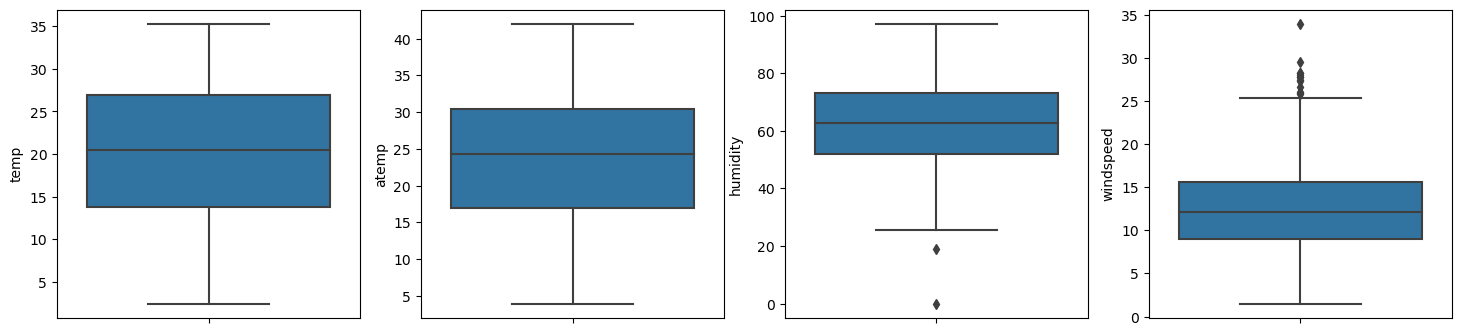

In [23]:
cols = ['temp', 'atemp', 'humidity', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=newBikeData)
    i+=1

- So from the above plots it is clear that we don't have any outliers

## EDA

As observerd, all the columns are of numerical type, but from the data dictionary we see that there are some columns which represents categorical data as well.

- Binary Types : year, holiday, workingday
- Categorical Types: season, month, weekday, weather
- Numeric types: temp, atemp, Humidity, windspeed, Count

In [24]:
# mapping catgorial data to names for better visibility and understanding 
# season (1:spring, 2:summer, 3:fall, 4:winter)
newBikeData['season'] = newBikeData['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})
newBikeData.head()

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,count
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


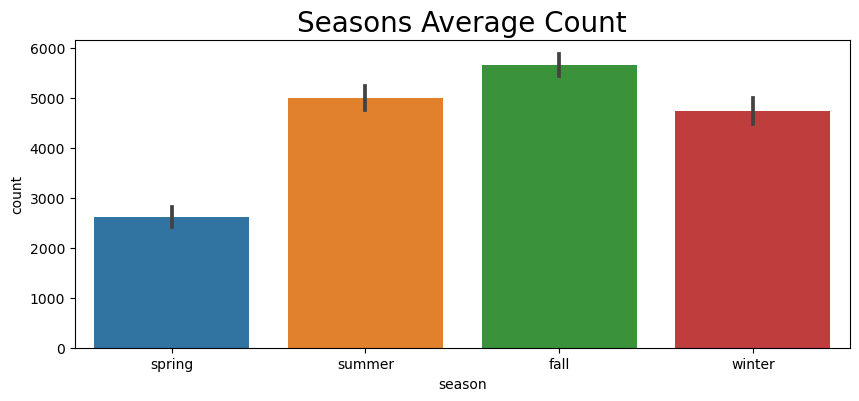

In [25]:
# Visualising Seasons count of rented bikes
plt.figure(figsize=[10,4])
ax = sns.barplot(newBikeData, x="season", y="count")
plt.title('Seasons Average Count', fontsize = 20)
plt.show()

#### Insights

- In fall, highest demand of rented the bikes, followed by Summer and Winter
- Spring season having less bike demands

In [26]:
# mapping Year varible proper names for better visibilty
newBikeData['year'] = newBikeData['year'].map({0:'2018',1:'2019'})
newBikeData.head()

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,count
0,spring,2018,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


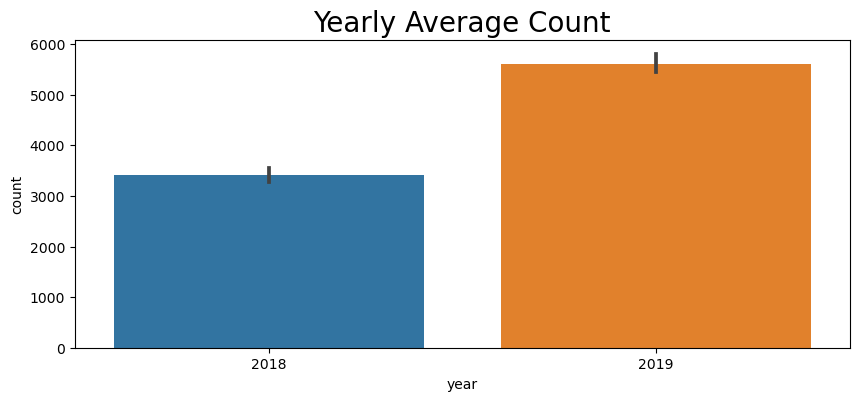

In [27]:
#ploting year count of rented bikes
plt.figure(figsize=[10,4])
ax = sns.barplot(newBikeData, x="year", y="count")
plt.title('Yearly Average Count', fontsize = 20)
plt.show()

#### Insights
- In 2019 bike rentals are almost double 2018 bike rentals post pendemic effect

In [28]:
# mapping month varible proper names for better visibilty
newBikeData['month'] = newBikeData['month'].map({1:'Jan',2:'Feb',3:'Mar',4:'April',
                                       5:'May',6:'June',7:'July',8:'Aug',
                                       9:'Sept',10:'Oct',11:'Nov',12:'Dec'})
newBikeData.head()

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,count
0,spring,2018,Jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


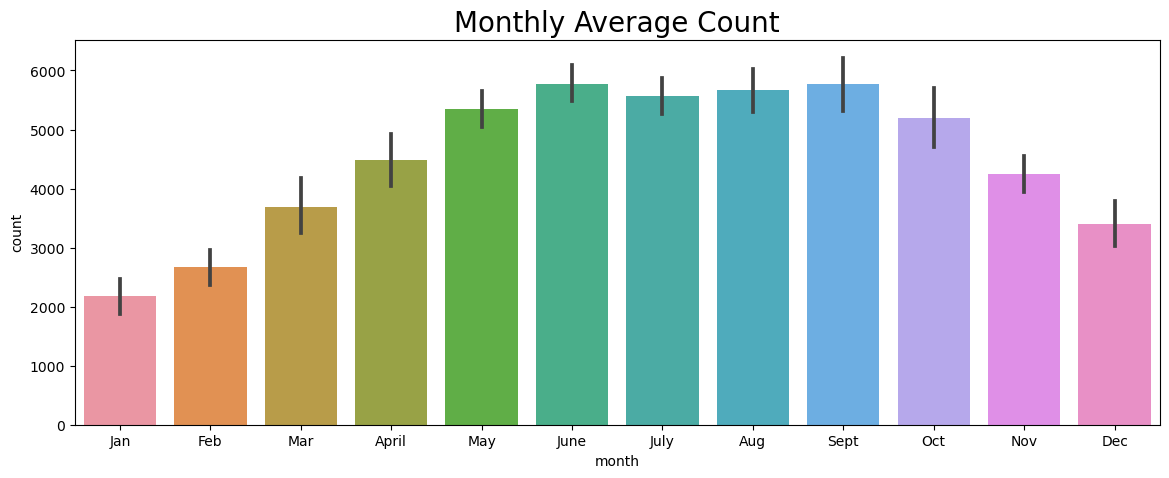

In [29]:
# Visualising Monthly count of rented bikes
plt.figure(figsize=[14,5])
ax = sns.barplot(newBikeData, x="month", y="count")
plt.title('Monthly Average Count', fontsize = 20)
plt.show()

#### Insights

- Almost similar average count of rented bikes in June, July August and September followed by May, October.
- And, company needs to make high availablity of bikes during these months
- December, January, February have the least demand probably due to winter season

In [30]:
# mapping weekday variable proper names for better visibilty
newBikeData['weekday'] = newBikeData['weekday'].map({0:'Mon',1:'Tues',2:'Wed',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'})
newBikeData.head()

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,count
0,spring,2018,Jan,0,Sun,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,0,Mon,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,0,Tues,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,0,Wed,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,0,Thurs,1,1,9.305237,11.46350,43.6957,12.522300,1600


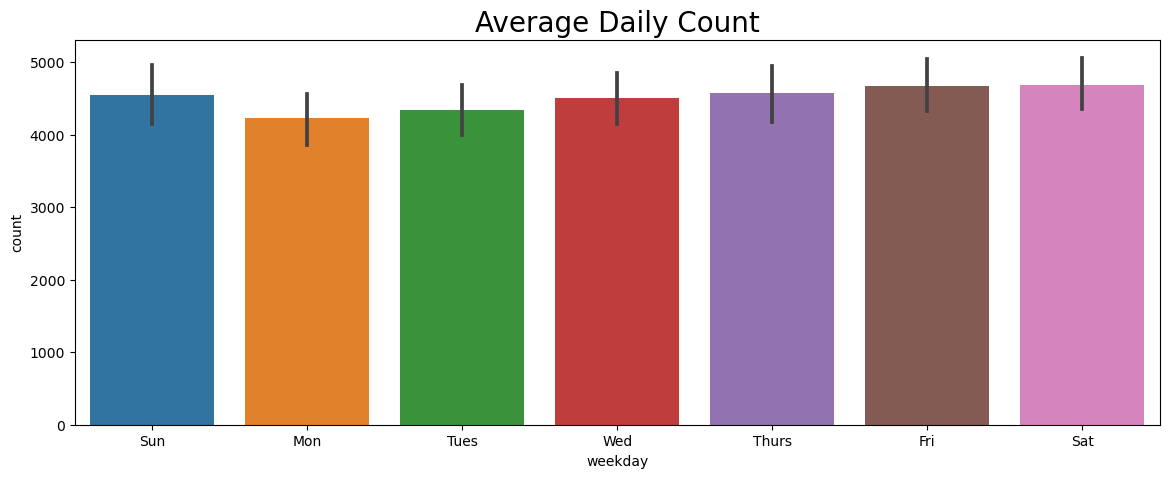

In [31]:
# Visualising Daily count of rented bikes
plt.figure(figsize=[14,5])
ax = sns.barplot(newBikeData, x="weekday", y="count")
plt.title('Average Daily Count', fontsize = 20)
plt.show()

#### Insights

- All days have similar demands, but still Sunday, Monday, Saturday, Friday has high demands than other days

In [32]:
# mapping workingday varible proper names for better visibilty
newBikeData['workingday'] = newBikeData['workingday'].map({0:'No',1:'Yes'})

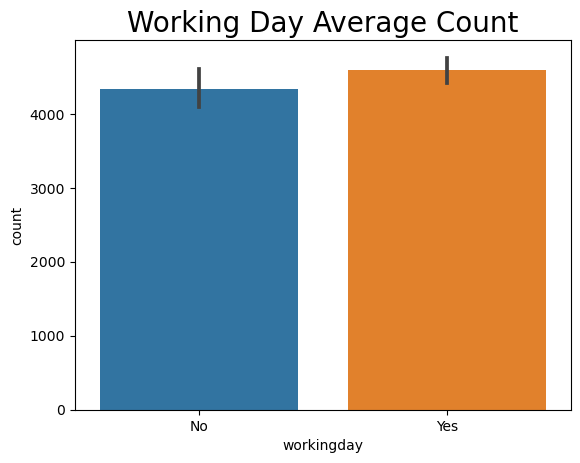

In [33]:
# Visualising Working day count of rented bikes
ax = sns.barplot(newBikeData, x="workingday", y="count")
plt.title('Working Day Average Count', fontsize = 20)
plt.show()

#### Insights

- similar demands in working and non working days

In [34]:
# mapping Weather varible proper names for better visibilty
#weathersit : 
# 1: Clear, Few clouds, Partly cloudy   = Good/Clear
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist = Moderate/Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  = Bad/Light Rain
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog = Worse/Heavy Rain
newBikeData['weather'] = newBikeData['weather'].map({1:"Good/Clear",2:'Moderate/Misty',3:'Bad/LightRain',4:'Worse/HeavyRain'})

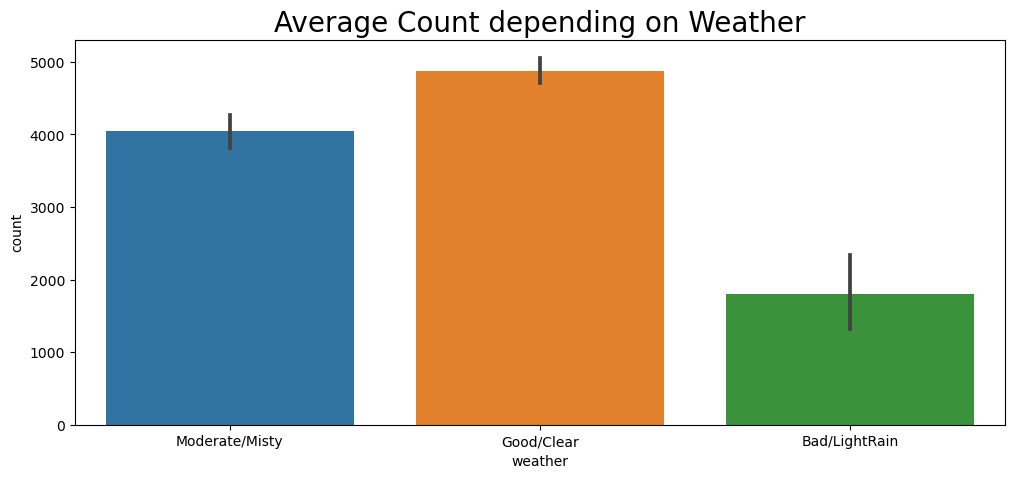

In [35]:
# Visualising Daily count of rented bikes
plt.figure(figsize=[12,5])
ax = sns.barplot(newBikeData, x="weather", y="count")
plt.title('Average Count depending on Weather', fontsize = 20)
plt.show()

#### Insights

- It clearly shows that if the weather is clear, the bikes demand is more
- If the weather is bad, demand decreases drastically
- Company should look for weather forecast to meet the demands

In [36]:
# mapping holiday varible proper names for better visibilty
newBikeData['holiday'] = newBikeData['holiday'].map({0:'No',1:'Yes'})

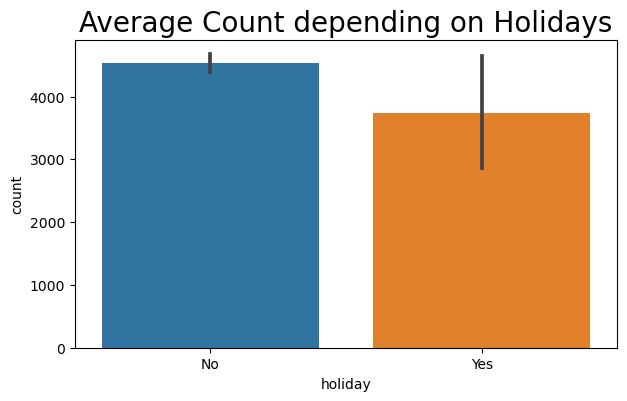

In [37]:
# Visualising Holiday wise count of rented bikes
plt.figure(figsize=[7,4])
ax = sns.barplot(newBikeData, x="holiday", y="count")
plt.title('Average Count depending on Holidays', fontsize = 20)
plt.show()

#### Insights

- Interestingly there is high decrease of demand if it is a holiday

#### Numerical Variables Plots

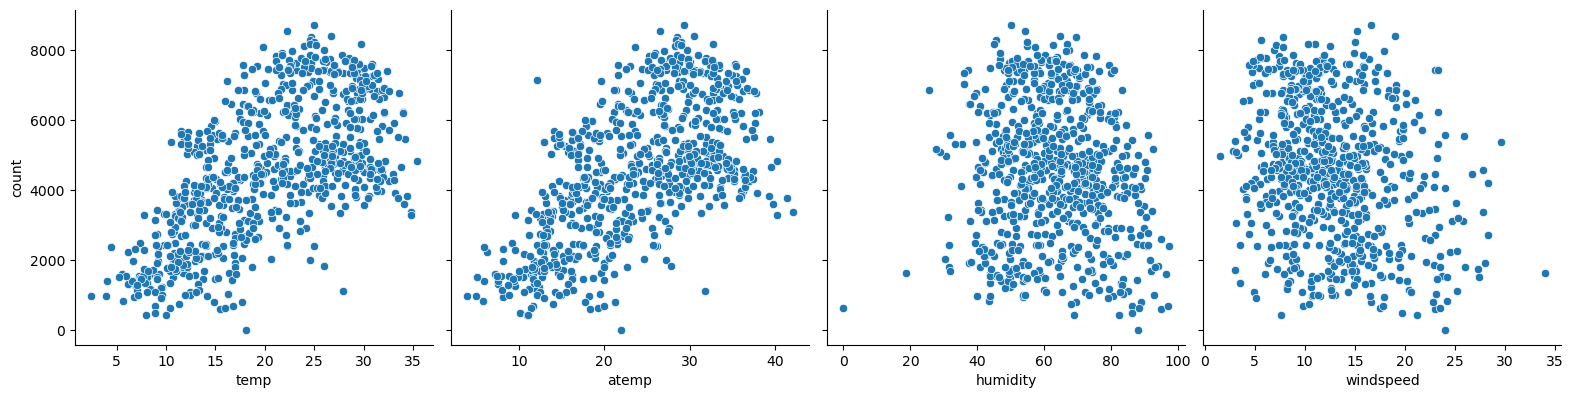

In [38]:
# comparision plots for the numerical variables
sns.pairplot(newBikeData, x_vars=['temp','atemp','humidity','windspeed'], y_vars='count',size=4, aspect=1, kind='scatter', diag_kind = None)
plt.show()

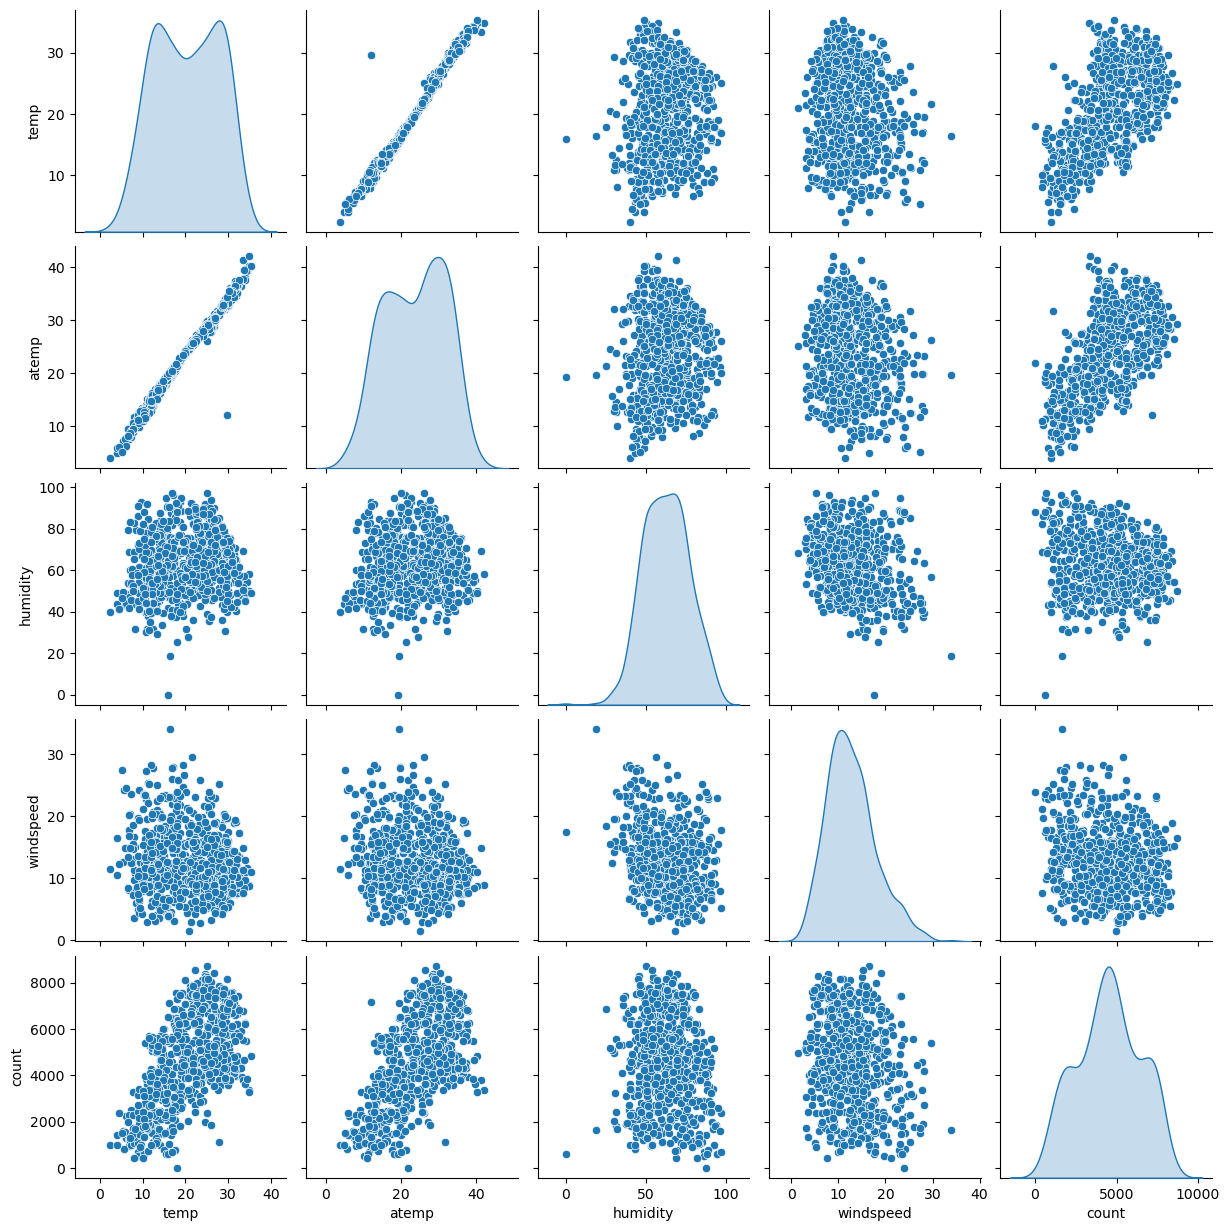

In [39]:
#check for the more linear relationship 
bike_num=newBikeData[[ 'temp', 'atemp', 'humidity', 'windspeed','count']]
sns.pairplot(bike_num, diag_kind='kde')
plt.show()

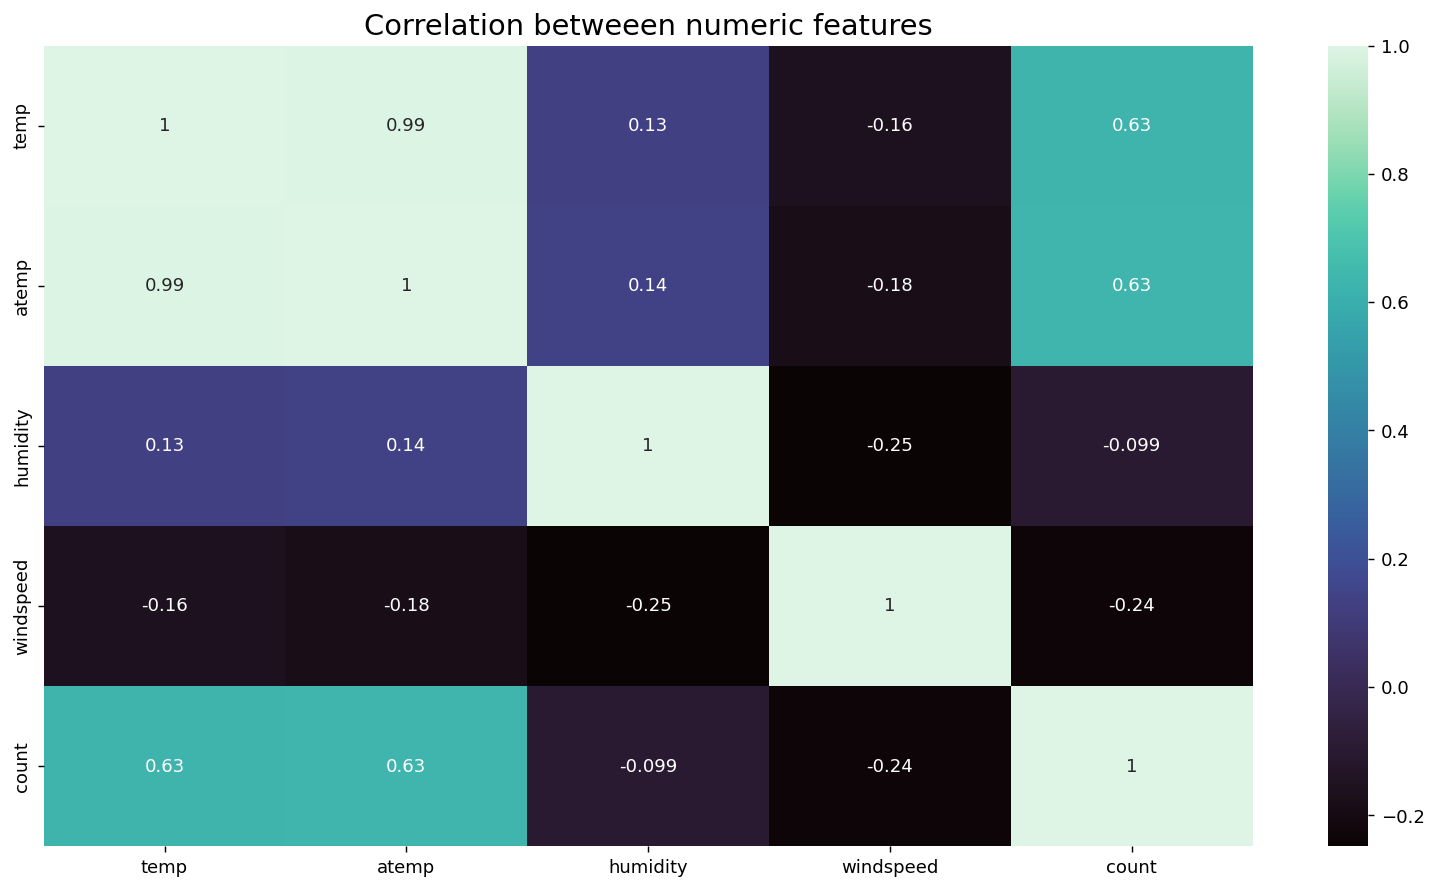

In [40]:
#Correlation between the numerical variables
num_features = ["temp","atemp","humidity","windspeed","count"]
plt.figure(figsize=(15,8),dpi=130)
plt.title("Correlation betweeen numeric features",fontsize=16)
sns.heatmap(newBikeData[num_features].corr(),annot= True,cmap="mako")
plt.show()

#### Insights

- As seen from the above plots, there is some linear relation between temp, atemp with count.
- This shows that we can do linear regression for solving the problem.

#### Independent variables which could be a good predictor from EDA are:

- year
- temp
- weather
- months
- seasons
- workingday

## Data preparation for Linear Regression

- Creating dummy variables for categorical variables

In [41]:
# creating a list and putting all category columns in to it and converting them to category data type
cat = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather']

for i in cat:
    newBikeData[i] = newBikeData[i].astype('category')

In [42]:
# checking converted datatypes
newBikeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   year        730 non-null    category
 2   month       730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weather     730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   humidity    730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  count       730 non-null    int64   
dtypes: category(7), float64(4), int64(1)
memory usage: 35.1 KB


In [43]:
# for Linear model creating dummies
dummy = pd.get_dummies(newBikeData[cat], drop_first=True)
dummy.head()

,season_spring,season_summer,season_winter,year_2019,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_June,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,workingday_Yes,weather_Good/Clear,weather_Moderate/Misty
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,1,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0


In [44]:
# Combining both the dataframe, newBikeData and of dummy variables
bike_new = pd.concat([newBikeData,dummy], axis=1)
bike_new.head()

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,workingday_Yes,weather_Good/Clear,weather_Moderate/Misty
0,spring,2018,Jan,No,Sun,No,Moderate/Misty,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,0,1
1,spring,2018,Jan,No,Mon,No,Moderate/Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,0,0,0,1
2,spring,2018,Jan,No,Tues,Yes,Good/Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,1,0,1,1,0
3,spring,2018,Jan,No,Wed,Yes,Good/Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,1,1,0
4,spring,2018,Jan,No,Thurs,Yes,Good/Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,1,0


In [45]:
# dropping columns from which dummy varibles were created
bike_new.drop(cat, axis=1, inplace = True)

In [46]:
bike_new.head()

,temp,atemp,humidity,windspeed,count,season_spring,season_summer,season_winter,year_2019,month_Aug,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,workingday_Yes,weather_Good/Clear,weather_Moderate/Misty
0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
3,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
4,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0


In [47]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   temp                    730 non-null    float64
 1   atemp                   730 non-null    float64
 2   humidity                730 non-null    float64
 3   windspeed               730 non-null    float64
 4   count                   730 non-null    int64  
 5   season_spring           730 non-null    uint8  
 6   season_summer           730 non-null    uint8  
 7   season_winter           730 non-null    uint8  
 8   year_2019               730 non-null    uint8  
 9   month_Aug               730 non-null    uint8  
 10  month_Dec               730 non-null    uint8  
 11  month_Feb               730 non-null    uint8  
 12  month_Jan               730 non-null    uint8  
 13  month_July              730 non-null    uint8  
 14  month_June              730 non-null    ui

- Now there are total of 30 columns, we will start model building now

## Train the test split

In [48]:
# importing statsmodel and sklearn libraries for Linear regression model building
import sklearn
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [49]:
# splitting the date into two train and test dataframes
np.random.seed(0)
#split 70:30 ratio
df_train_bike_new, df_test_bike_new = train_test_split(bike_new, train_size=0.70,test_size=0.30, random_state=42)

In [50]:
# verify the columns and rows
print(df_train_bike_new.shape)
print(df_test_bike_new.shape)

(510, 30)
(219, 30)


### Rescaling the features

- using MinMax Scaler

In [51]:
# importing MinMax scaler from preprocessing module of sklearn library
from sklearn.preprocessing import MinMaxScaler

In [52]:
# defining a variable scaler for minmax scaling
scaler = MinMaxScaler()

In [53]:
bike_new.columns

Index(['temp', 'atemp', 'humidity', 'windspeed', 'count', 'season_spring',
       'season_summer', 'season_winter', 'year_2019', 'month_Aug', 'month_Dec',
       'month_Feb', 'month_Jan', 'month_July', 'month_June', 'month_Mar',
       'month_May', 'month_Nov', 'month_Oct', 'month_Sept', 'holiday_Yes',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thurs',
       'weekday_Tues', 'weekday_Wed', 'workingday_Yes', 'weather_Good/Clear',
       'weather_Moderate/Misty'],
      dtype='object')

In [54]:
# performing scaling on all the numericals variables of train dataset
num_vars = ['temp', 'atemp', 'humidity', 'windspeed', 'count']
df_train_bike_new[num_vars] = scaler.fit_transform(df_train_bike_new[num_vars])
df_train_bike_new[num_vars].head()

,temp,atemp,humidity,windspeed,count
683,0.327133,0.322150,0.639330,0.327101,0.605336
645,0.403972,0.404998,0.731215,0.419004,0.609320
163,0.717562,0.685963,0.509660,0.708724,0.554026
360,0.331287,0.326273,0.785745,0.415925,0.088253
640,0.745598,0.682653,0.817947,0.110593,0.862127


In [55]:
# checking all columns and all the variables after scaling
df_train_bike_new.describe()

,temp,atemp,humidity,windspeed,count,season_spring,season_summer,season_winter,year_2019,month_Aug,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,workingday_Yes,weather_Good/Clear,weather_Moderate/Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.551091,0.526680,0.653801,0.414566,0.498206,0.231373,0.256863,0.250980,0.521569,0.074510,...,0.027451,0.152941,0.129412,0.150980,0.139216,0.149020,0.131373,0.668627,0.625490,0.345098
std,0.227401,0.213153,0.143542,0.185671,0.233905,0.422124,0.437332,0.434003,0.500025,0.262857,...,0.163554,0.360284,0.335985,0.358381,0.346511,0.356457,0.338139,0.471169,0.484471,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.354176,0.352585,0.544033,0.281934,0.345950,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.575824,0.564951,0.659296,0.383964,0.502233,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.745338,0.698389,0.756762,0.525698,0.677080,0.000000,1.000000,0.750000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Before start the training process we will plot a heat map to check multicollinearity

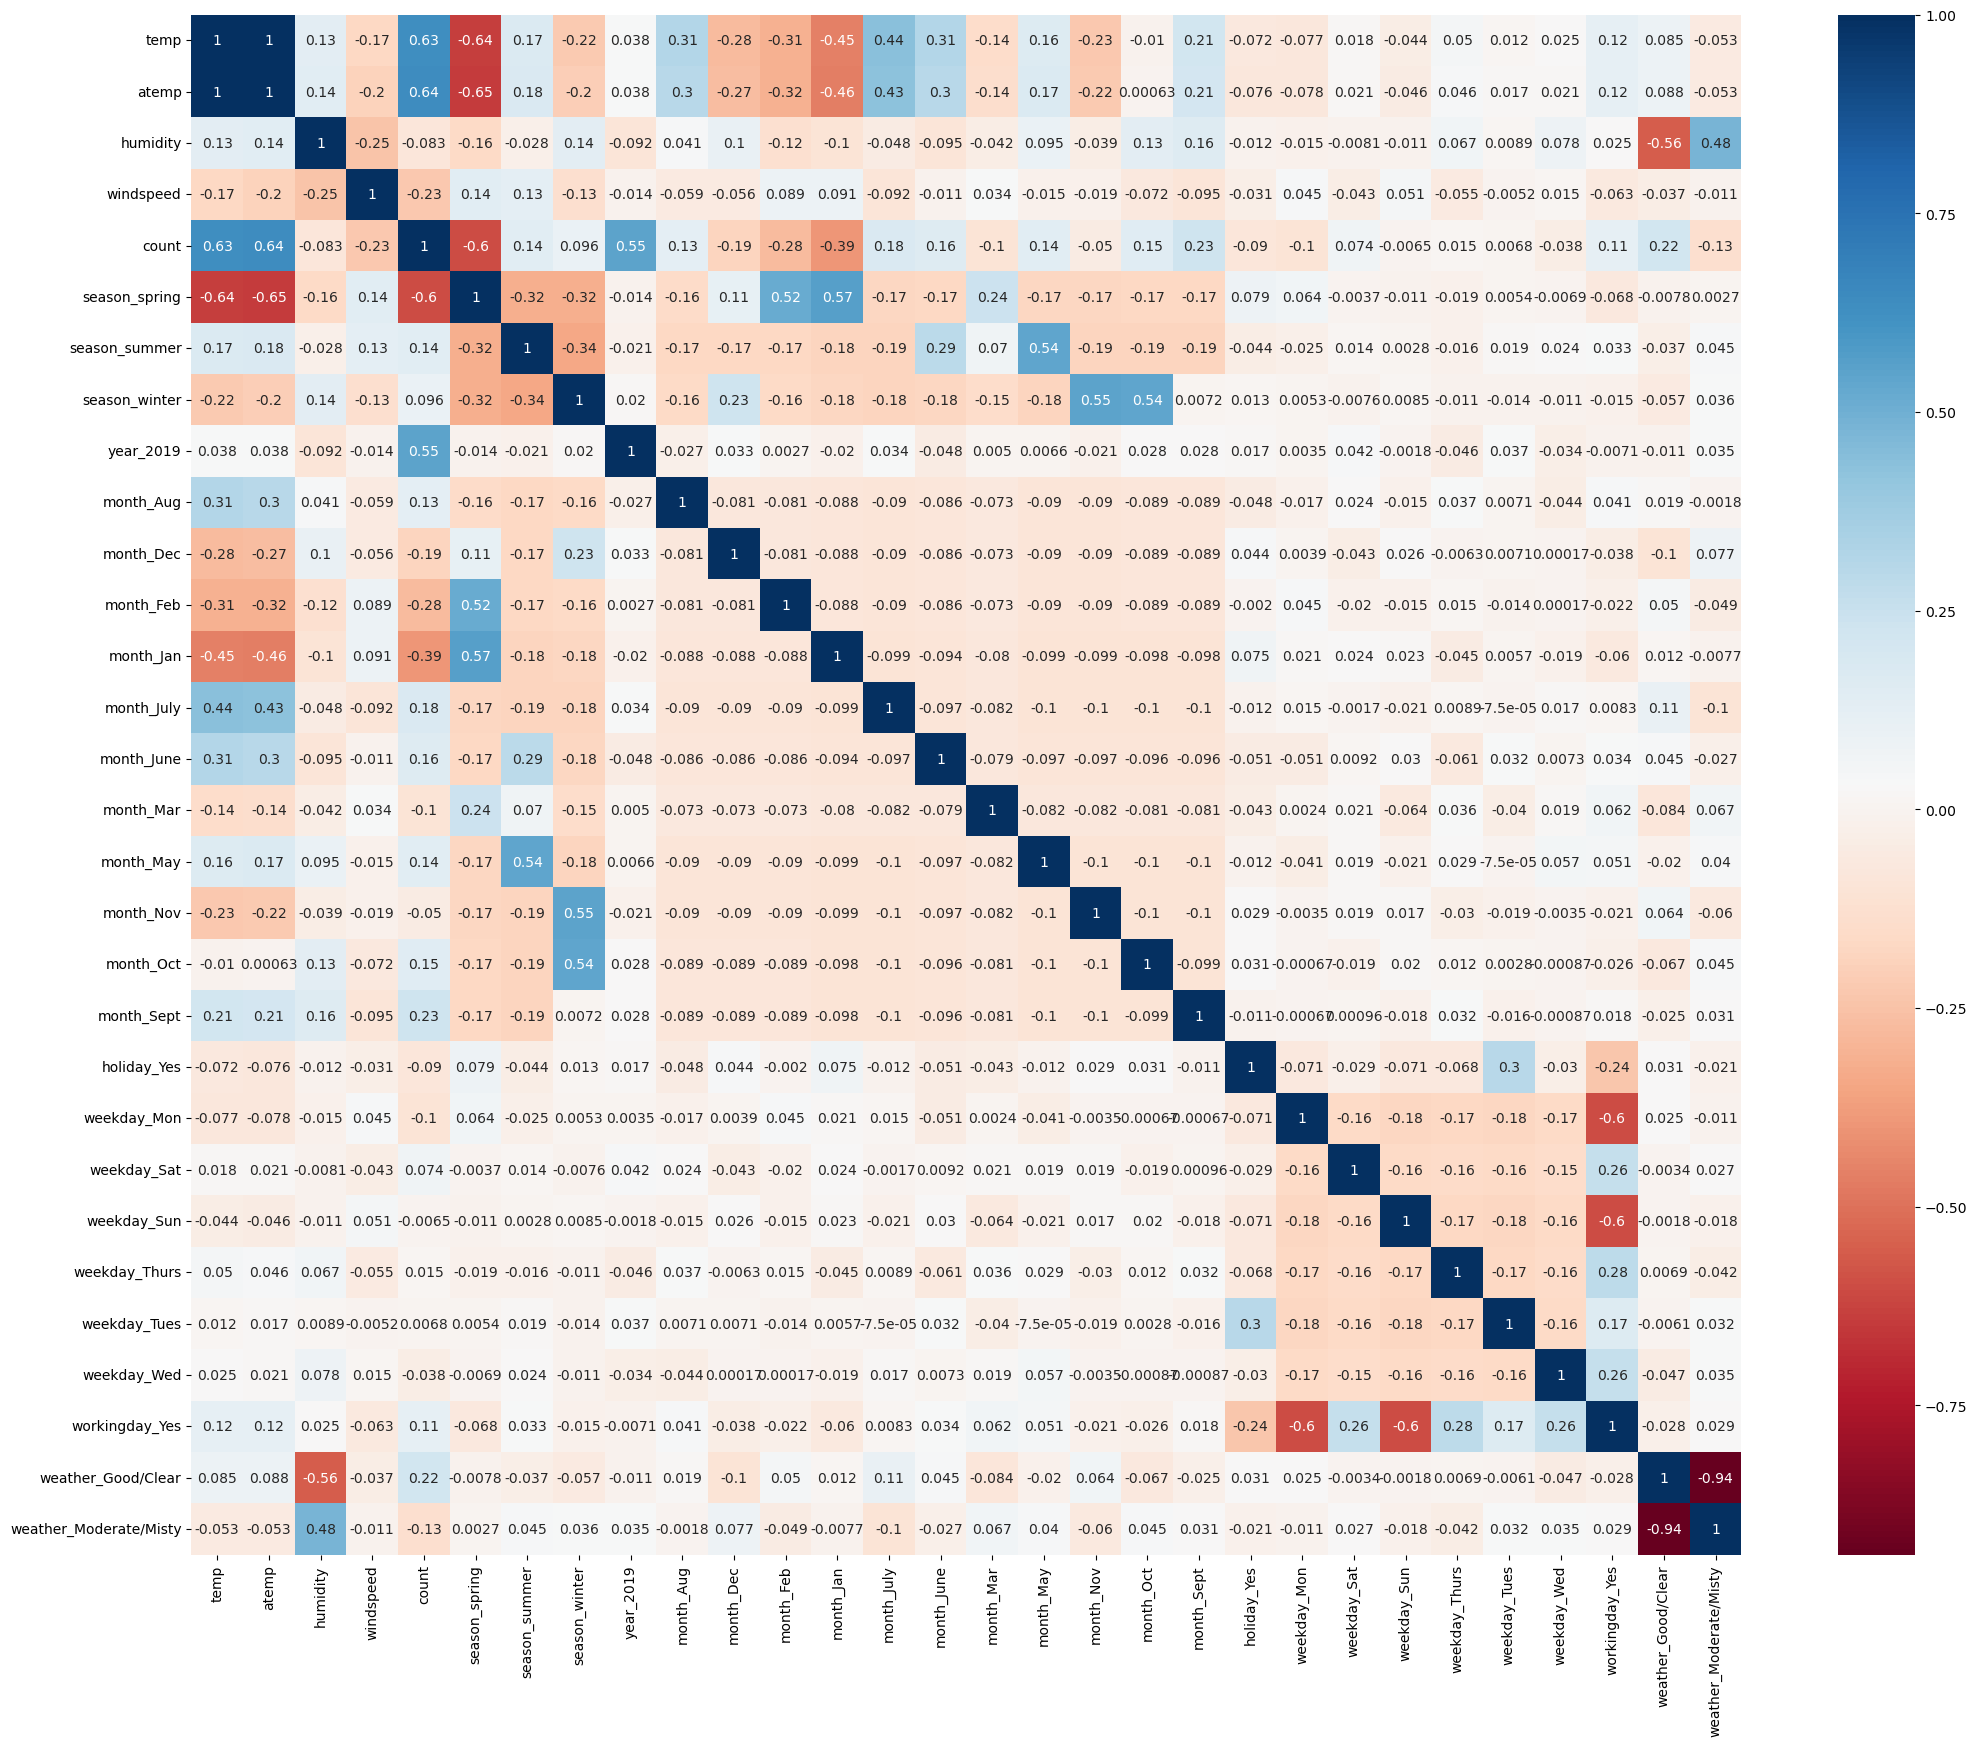

In [56]:
#Let's check the correlation coefficients to see which variables are highly correlated.
plt.figure(figsize = [25,20])
sns.heatmap(df_train_bike_new.corr(),annot =True, cmap= 'RdBu')
plt.show()

## Insight

- The heatmap clearly shows which all variable are multicollinear in nature with the target variable.
- We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

## Model Building

A mixed approach is followed.

- 15 Best columns are chosen using RFE
- And then p-value method is followed for further elimination.
- Recursive Feature Elimination

In [57]:
# Dividing training set into x_train and y_train sets for the model building
y_train = df_train_bike_new.pop('count')
x_train = df_train_bike_new

print(y_train.shape)
print(x_train.shape)

(510,)
(510, 29)


In [58]:
#importing RFE library for feature selection and after this will perform manual feature selection.

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# importing statsmodels to add constant/intercept.
import statsmodels.api as sm
# importing libraries to check the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
# using RFE for feature selection and  limiting to selecton to 15 features
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [60]:
rfe = RFE(lm,n_features_to_select=15) # running RFE
rfe = rfe.fit(x_train, y_train)

In [61]:
#creating a list of features selected by RFE
list(zip(x_train, rfe.support_, rfe.ranking_))

[('temp', False, 2),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 11),
 ('season_winter', True, 1),
 ('year_2019', True, 1),
 ('month_Aug', False, 6),
 ('month_Dec', True, 1),
 ('month_Feb', False, 10),
 ('month_Jan', False, 13),
 ('month_July', True, 1),
 ('month_June', False, 14),
 ('month_Mar', True, 1),
 ('month_May', False, 4),
 ('month_Nov', True, 1),
 ('month_Oct', False, 5),
 ('month_Sept', True, 1),
 ('holiday_Yes', False, 3),
 ('weekday_Mon', False, 8),
 ('weekday_Sat', False, 12),
 ('weekday_Sun', True, 1),
 ('weekday_Thurs', False, 15),
 ('weekday_Tues', False, 9),
 ('weekday_Wed', False, 7),
 ('workingday_Yes', True, 1),
 ('weather_Good/Clear', True, 1),
 ('weather_Moderate/Misty', True, 1)]

In [62]:
#creating a list of features selected by RFE
rfe_col = x_train.columns[rfe.support_]
rfe_col

Index(['atemp', 'humidity', 'windspeed', 'season_spring', 'season_winter',
       'year_2019', 'month_Dec', 'month_July', 'month_Mar', 'month_Nov',
       'month_Sept', 'weekday_Sun', 'workingday_Yes', 'weather_Good/Clear',
       'weather_Moderate/Misty'],
      dtype='object')

In [63]:
# feature which are chosen by RFE during feature selection( so un-supported columns)
x_train.columns[~rfe.support_]

Index(['temp', 'season_summer', 'month_Aug', 'month_Feb', 'month_Jan',
       'month_June', 'month_May', 'month_Oct', 'holiday_Yes', 'weekday_Mon',
       'weekday_Sat', 'weekday_Thurs', 'weekday_Tues', 'weekday_Wed'],
      dtype='object')

In [64]:
# Creating new train dataframe with RFE selected features
x_train_rfe = x_train[rfe_col]
x_train_rfe.head()

,atemp,humidity,windspeed,season_spring,season_winter,year_2019,month_Dec,month_July,month_Mar,month_Nov,month_Sept,weekday_Sun,workingday_Yes,weather_Good/Clear,weather_Moderate/Misty
683,0.322150,0.639330,0.327101,0,1,1,0,0,0,1,0,0,1,0,1
645,0.404998,0.731215,0.419004,0,1,1,0,0,0,0,0,0,0,0,1
163,0.685963,0.509660,0.708724,0,0,0,0,0,0,0,0,0,1,1,0
360,0.326273,0.785745,0.415925,1,0,0,1,0,0,0,0,0,1,0,1
640,0.682653,0.817947,0.110593,0,1,1,0,0,0,0,0,0,1,0,1


## Model 1

In [65]:
# Add a constant
x_train_lm1 = sm.add_constant(x_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, x_train_lm1).fit()

lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     177.6
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          7.32e-188
Time:                        10:20:39   Log-Likelihood:                 490.80
No. Observations:                 510   AIC:                            -949.6
Df Residuals:                     494   BIC:                            -881.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.0681      0.052      1.318      0.188      -0.033       0.170
atemp                      0.4576      0.037     12.341      0.000       0.385       0.530
humidity                  -0.1597      0.040     -4.012      0.000      -0.238      -0.081
windspeed                 -0.1083      0.025     -4.373      0.000      -0.157      -0.060
season_spring             -0.1577      0.017     -9.349      0.000      -0.191      -0.125
season_winter              0.0896      0.014      6.310      0.000       0.062       0.117
year_2019                  0.2372      0.008     28.039      0.000       0.221       0.254
month_Dec                 -0.0650      0.018     -3.622      0.000      -0.100      -0.030
month_July                -0.0544      0.017     -3.245      0.001      -0.087      -0.021
month_Mar                  0.0484      0.018      2.679      0.008       0.013       0.084
month_Nov                 -0.0846      0.019     -4.481      0.000      -0.122      -0.048
month_Sept                 0.0576      0.015      3.729      0.000       0.027       0.088
weekday_Sun                0.0529      0.015      3.618      0.000       0.024       0.082
workingday_Yes             0.0454      0.011      4.056      0.000       0.023       0.067
weather_Good/Clear         0.2267      0.028      8.038      0.000       0.171       0.282
weather_Moderate/Misty     0.1681      0.026      6.360      0.000       0.116       0.220
==============================================================================
Omnibus:                       80.545   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.298
Skew:                          -0.832   Prob(JB):                     5.80e-41
Kurtosis:                       5.439   Cond. No.                         29.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,atemp,23.55
1,humidity,22.28
13,weather_Good/Clear,14.31
14,weather_Moderate/Misty,8.99
2,windspeed,5.29
12,workingday_Yes,4.63
3,season_spring,3.40
4,season_winter,2.82
5,year_2019,2.12
9,month_Nov,1.89


## Model 2

- Removing column 'atemp' due very high VIF values and all the p-values < 0.05.

In [67]:
x_train_rfe2 = x_train_rfe.drop('atemp', axis = 1)

# Add a constant
x_train_lm2 = sm.add_constant(x_train_rfe2)

# Create a first fitted model
lr2 = sm.OLS(y_train, x_train_lm2).fit()

lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     137.4
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          2.81e-160
Time:                        10:20:39   Log-Likelihood:                 422.27
No. Observations:                 510   AIC:                            -814.5
Df Residuals:                     495   BIC:                            -751.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2508      0.057      4.435      0.000       0.140       0.362
humidity                  -0.0652      0.045     -1.460      0.145      -0.153       0.023
windspeed                 -0.1443      0.028     -5.132      0.000      -0.200      -0.089
season_spring             -0.3094      0.013    -23.434      0.000      -0.335      -0.283
season_winter              0.0306      0.015      2.002      0.046       0.001       0.061
year_2019                  0.2438      0.010     25.280      0.000       0.225       0.263
month_Dec                 -0.1119      0.020     -5.582      0.000      -0.151      -0.073
month_July                 0.0235      0.018      1.322      0.187      -0.011       0.058
month_Mar                  0.0463      0.021      2.244      0.025       0.006       0.087
month_Nov                 -0.1444      0.021     -6.924      0.000      -0.185      -0.103
month_Sept                 0.0789      0.018      4.492      0.000       0.044       0.113
weekday_Sun                0.0546      0.017      3.273      0.001       0.022       0.087
workingday_Yes             0.0579      0.013      4.546      0.000       0.033       0.083
weather_Good/Clear         0.2850      0.032      8.970      0.000       0.223       0.347
weather_Moderate/Misty     0.2051      0.030      6.836      0.000       0.146       0.264
==============================================================================
Omnibus:                       73.154   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.118
Skew:                          -0.761   Prob(JB):                     3.12e-37
Kurtosis:                       5.365   Cond. No.                         28.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe2.values, i) for i in range(x_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,humidity,15.61
12,weather_Good/Clear,10.00
13,weather_Moderate/Misty,7.76
1,windspeed,5.28
11,workingday_Yes,4.51
3,season_winter,2.56
4,year_2019,2.10
10,weekday_Sun,1.79
8,month_Nov,1.77
2,season_spring,1.73


## Model 3

- Removing columns 'humidity' due to high VIF values and all the p-values < 0.05.

In [69]:
x_train_rfe3 = x_train_rfe2.drop('humidity', axis = 1)#humidity

# Add a constant
x_train_lm3 = sm.add_constant(x_train_rfe3)

# Create a first fitted model
lr3 = sm.OLS(y_train, x_train_lm3).fit()

lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     147.4
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          6.53e-161
Time:                        10:20:39   Log-Likelihood:                 421.18
No. Observations:                 510   AIC:                            -814.4
Df Residuals:                     496   BIC:                            -755.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.1866      0.036      5.243      0.000       0.117       0.257
windspeed                 -0.1313      0.027     -4.918      0.000      -0.184      -0.079
season_spring             -0.3071      0.013    -23.402      0.000      -0.333      -0.281
season_winter              0.0297      0.015      1.945      0.052      -0.000       0.060
year_2019                  0.2457      0.010     25.658      0.000       0.227       0.264
month_Dec                 -0.1127      0.020     -5.617      0.000      -0.152      -0.073
month_July                 0.0240      0.018      1.353      0.177      -0.011       0.059
month_Mar                  0.0482      0.021      2.337      0.020       0.008       0.089
month_Nov                 -0.1430      0.021     -6.856      0.000      -0.184      -0.102
month_Sept                 0.0757      0.017      4.341      0.000       0.041       0.110
weekday_Sun                0.0554      0.017      3.315      0.001       0.023       0.088
workingday_Yes             0.0585      0.013      4.589      0.000       0.033       0.083
weather_Good/Clear         0.3036      0.029     10.415      0.000       0.246       0.361
weather_Moderate/Misty     0.2134      0.029      7.238      0.000       0.155       0.271
==============================================================================
Omnibus:                       72.521   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.055
Skew:                          -0.756   Prob(JB):                     8.74e-37
Kurtosis:                       5.351   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe3.values, i) for i in range(x_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,weather_Good/Clear,6.49
0,windspeed,5.14
10,workingday_Yes,4.21
12,weather_Moderate/Misty,4.12
2,season_winter,2.47
3,year_2019,2.10
7,month_Nov,1.77
1,season_spring,1.73
9,weekday_Sun,1.71
4,month_Dec,1.32


## Model 4

- Removing column 'month_July' due to high p-value (0.177)

In [71]:
x_train_rfe4 = x_train_rfe3.drop('month_July', axis = 1)

# Add a constant
x_train_lm4 = sm.add_constant(x_train_rfe4)

# Create a first fitted model
lr4 = sm.OLS(y_train, x_train_lm4).fit()

lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     159.3
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.25e-161
Time:                        10:20:39   Log-Likelihood:                 420.24
No. Observations:                 510   AIC:                            -814.5
Df Residuals:                     497   BIC:                            -759.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.1945      0.035      5.536      0.000       0.125       0.264
windspeed                 -0.1353      0.027     -5.096      0.000      -0.187      -0.083
season_spring             -0.3114      0.013    -24.438      0.000      -0.336      -0.286
season_winter              0.0254      0.015      1.700      0.090      -0.004       0.055
year_2019                  0.2463      0.010     25.725      0.000       0.227       0.265
month_Dec                 -0.1134      0.020     -5.647      0.000      -0.153      -0.074
month_Mar                  0.0462      0.021      2.245      0.025       0.006       0.087
month_Nov                 -0.1437      0.021     -6.887      0.000      -0.185      -0.103
month_Sept                 0.0718      0.017      4.170      0.000       0.038       0.106
weekday_Sun                0.0544      0.017      3.258      0.001       0.022       0.087
workingday_Yes             0.0579      0.013      4.540      0.000       0.033       0.083
weather_Good/Clear         0.3029      0.029     10.384      0.000       0.246       0.360
weather_Moderate/Misty     0.2115      0.029      7.175      0.000       0.154       0.269
==============================================================================
Omnibus:                       72.205   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.974
Skew:                          -0.748   Prob(JB):                     3.35e-37
Kurtosis:                       5.380   Cond. No.                         18.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
# Check for the VIF values of the feature variables. 
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe4.values, i) for i in range(x_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,weather_Good/Clear,6.13
0,windspeed,5.13
9,workingday_Yes,4.21
11,weather_Moderate/Misty,4.01
2,season_winter,2.39
3,year_2019,2.09
6,month_Nov,1.77
8,weekday_Sun,1.71
1,season_spring,1.64
4,month_Dec,1.32


## Model 5

- Removing column 'season_winter' because high p-values (0.090)

In [73]:
x_train_rfe5 = x_train_rfe4.drop('season_winter', axis = 1)

# Add a constant
x_train_lm5 = sm.add_constant(x_train_rfe5)

# Create a first fitted model
lr5 = sm.OLS(y_train, x_train_lm5).fit()

lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     172.9
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          3.91e-162
Time:                        10:20:40   Log-Likelihood:                 418.76
No. Observations:                 510   AIC:                            -813.5
Df Residuals:                     498   BIC:                            -762.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2057      0.035      5.950      0.000       0.138       0.274
windspeed                 -0.1399      0.026     -5.285      0.000      -0.192      -0.088
season_spring             -0.3175      0.012    -25.932      0.000      -0.342      -0.293
year_2019                  0.2467      0.010     25.728      0.000       0.228       0.266
month_Dec                 -0.1011      0.019     -5.386      0.000      -0.138      -0.064
month_Mar                  0.0449      0.021      2.178      0.030       0.004       0.085
month_Nov                 -0.1231      0.017     -7.232      0.000      -0.157      -0.090
month_Sept                 0.0732      0.017      4.248      0.000       0.039       0.107
weekday_Sun                0.0535      0.017      3.198      0.001       0.021       0.086
workingday_Yes             0.0571      0.013      4.475      0.000       0.032       0.082
weather_Good/Clear         0.2983      0.029     10.252      0.000       0.241       0.356
weather_Moderate/Misty     0.2082      0.029      7.066      0.000       0.150       0.266
==============================================================================
Omnibus:                       67.353   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.976
Skew:                          -0.730   Prob(JB):                     5.45e-32
Kurtosis:                       5.155   Cond. No.                         17.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_rfe5.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe5.values, i) for i in range(x_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,weather_Good/Clear,6.01
0,windspeed,5.13
8,workingday_Yes,4.20
10,weather_Moderate/Misty,3.90
2,year_2019,2.09
7,weekday_Sun,1.71
1,season_spring,1.52
4,month_Mar,1.17
5,month_Nov,1.17
6,month_Sept,1.16


## Model 6

- Removing column 'month_Mar' due to high p-value (0.030)

In [75]:
x_train_rfe6 = x_train_rfe5.drop('month_Mar', axis = 1)

# Add a constant
x_train_lm6 = sm.add_constant(x_train_rfe6)

# Create a first fitted model
lr6 = sm.OLS(y_train, x_train_lm6).fit()

lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     188.3
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          2.91e-162
Time:                        10:20:41   Log-Likelihood:                 416.34
No. Observations:                 510   AIC:                            -810.7
Df Residuals:                     499   BIC:                            -764.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2112      0.035      6.102      0.000       0.143       0.279
windspeed                 -0.1409      0.027     -5.304      0.000      -0.193      -0.089
season_spring             -0.3113      0.012    -26.046      0.000      -0.335      -0.288
year_2019                  0.2470      0.010     25.669      0.000       0.228       0.266
month_Dec                 -0.1061      0.019     -5.674      0.000      -0.143      -0.069
month_Nov                 -0.1250      0.017     -7.325      0.000      -0.159      -0.091
month_Sept                 0.0708      0.017      4.106      0.000       0.037       0.105
weekday_Sun                0.0526      0.017      3.137      0.002       0.020       0.086
workingday_Yes             0.0583      0.013      4.560      0.000       0.033       0.083
weather_Good/Clear         0.2938      0.029     10.084      0.000       0.237       0.351
weather_Moderate/Misty     0.2055      0.030      6.954      0.000       0.147       0.264
==============================================================================
Omnibus:                       59.773   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.377
Skew:                          -0.643   Prob(JB):                     1.80e-29
Kurtosis:                       5.139   Cond. No.                         17.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_rfe6.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe6.values, i) for i in range(x_train_rfe6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,weather_Good/Clear,6.01
0,windspeed,5.13
7,workingday_Yes,4.18
9,weather_Moderate/Misty,3.89
2,year_2019,2.09
6,weekday_Sun,1.71
1,season_spring,1.43
4,month_Nov,1.16
5,month_Sept,1.16
3,month_Dec,1.11


## Model 7

- Removing column 'workingday_Yes' as from EDA we go to know working days and holidays dont make much difference 

In [77]:
x_train_rfe7 = x_train_rfe6.drop('workingday_Yes', axis = 1)

# Add a constant
x_train_lm7 = sm.add_constant(x_train_rfe7)

# Create a first fitted model
lr7 = sm.OLS(y_train, x_train_lm7).fit()

lr7.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     199.0
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          5.08e-159
Time:                        10:20:42   Log-Likelihood:                 405.93
No. Observations:                 510   AIC:                            -791.9
Df Residuals:                     500   BIC:                            -749.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2670      0.033      8.091      0.000       0.202       0.332
windspeed                 -0.1453      0.027     -5.370      0.000      -0.199      -0.092
season_spring             -0.3162      0.012    -26.051      0.000      -0.340      -0.292
year_2019                  0.2466      0.010     25.137      0.000       0.227       0.266
month_Dec                 -0.1087      0.019     -5.702      0.000      -0.146      -0.071
month_Nov                 -0.1274      0.017     -7.327      0.000      -0.162      -0.093
month_Sept                 0.0696      0.018      3.955      0.000       0.035       0.104
weekday_Sun                0.0067      0.014      0.488      0.626      -0.020       0.034
weather_Good/Clear         0.2869      0.030      9.672      0.000       0.229       0.345
weather_Moderate/Misty     0.2001      0.030      6.645      0.000       0.141       0.259
==============================================================================
Omnibus:                       64.038   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.231
Skew:                          -0.714   Prob(JB):                     5.26e-29
Kurtosis:                       5.022   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_rfe7.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe7.values, i) for i in range(x_train_rfe7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,windspeed,5.02
7,weather_Good/Clear,4.32
8,weather_Moderate/Misty,2.90
2,year_2019,2.09
1,season_spring,1.43
6,weekday_Sun,1.18
4,month_Nov,1.16
5,month_Sept,1.16
3,month_Dec,1.11


## Model 8
 
- Remove column 'weekday_Sun' as from EDA we got to know there is almost similar demands in all week days

In [79]:
x_train_rfe8 = x_train_rfe7.drop('weekday_Sun', axis = 1)

# Add a constant
x_train_lm8 = sm.add_constant(x_train_rfe8)

# Create a first fitted model
lr8 = sm.OLS(y_train, x_train_lm8).fit()

lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     224.2
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          3.70e-160
Time:                        10:20:44   Log-Likelihood:                 405.81
No. Observations:                 510   AIC:                            -793.6
Df Residuals:                     501   BIC:                            -755.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2684      0.033      8.170      0.000       0.204       0.333
windspeed                 -0.1447      0.027     -5.357      0.000      -0.198      -0.092
season_spring             -0.3163      0.012    -26.085      0.000      -0.340      -0.292
year_2019                  0.2466      0.010     25.157      0.000       0.227       0.266
month_Dec                 -0.1084      0.019     -5.695      0.000      -0.146      -0.071
month_Nov                 -0.1273      0.017     -7.326      0.000      -0.161      -0.093
month_Sept                 0.0695      0.018      3.953      0.000       0.035       0.104
weather_Good/Clear         0.2863      0.030      9.667      0.000       0.228       0.344
weather_Moderate/Misty     0.1994      0.030      6.634      0.000       0.140       0.258
==============================================================================
Omnibus:                       63.747   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.980
Skew:                          -0.710   Prob(JB):                     5.96e-29
Kurtosis:                       5.024   Cond. No.                         15.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_rfe8.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe8.values, i) for i in range(x_train_rfe8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,windspeed,4.98
6,weather_Good/Clear,4.29
7,weather_Moderate/Misty,2.89
2,year_2019,2.09
1,season_spring,1.43
4,month_Nov,1.16
5,month_Sept,1.16
3,month_Dec,1.11


#### Now I see there is very less multicolinearity between the predictors and the p-values for all the predictors seems to be significant. 
#### For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

## Final Model Interpretation

#### Hypothesis Testing:

Hypothesis testing states that:
H0:B1=B2=...=Bn=0
H1: at least one Bi!=0

#### Model 8 coefficient values

- const = 0.2684
- windspeed = -0.1447
- season_spring = -0.3163
- weather_Good/Clear = 0.2863
- weather_Moderate/Misty = 0.1994
- year_2019 = 0.2466
- month_Nov = -0.1273
- month_Sept = 0.0695
- month_Dec = -0.1084

#### Insight: 

From the Model 8 model summary, it is evident that all our coefficients are not equal to zero. which means We REJECT the NULL HYPOTHESIS

F Statistics : F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

- F-statistic: 224.2
- Prob (F-statistic): 3.70e-160

The F-Statistics value of 224.2 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

### The equation for best fitted line based on Model 7

Count = 0.2684 - (windspeed * 0.1447) - (season_spring * 0.3163) + (weather_Good/Clear * 0.2863) + (year_2019 * 0.2466) - (month_Dec * 0.1084) - (month_Nov * 0.1273) + (month_Sept * 0.0695) + (weather_Moderate/Misty * 0.1994)

#### Interpretation of Coefficients:

- const: The Constant value of '0.2684' indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike demand still increases by 0.2684 units.

- windspeed: A coefficient value of '-0.1447' indicate a unit increase in windspeed variable, decreases bike demand by 0.1447 units.

- season_spring: A coefficient value of '0.3163' indicate a unit increase in season_spring variable, decreases bike demand by 0.3163 units.

- year_2019: A coefficient value of ‘0.2466’ indicate a unit increase in Year_2019 variable, increases the bike demand by 0.2466 units.

- month_Sept: A coefficient value of '0.0695' indicate a unit increase in month_Sept variable, increases the bike demand by 0.0695 units.

- month_Nov: A coefficient value of '0.1273' indicate a unit increase in month_Nov variable, decreases the bike demand by 0.1273 units.

- month_Dec: A coefficient value of '0.1084' indicate a unit increase in month_Dec variable, decreases the bike demand by 0.1084 units.

- weather_Good/Clear: A coefficient value of '0.2863' indicate a unit increase if the weather is good, increases the bike demand by 0.2863 units.

- weather_Moderate/Misty: A coefficient value of '0.1994' indicate a unit increase if the weather is moderate, increases the bike demand by 0.1994 units.

## Validate assumptions

In [81]:
#consider model 8 as the finest model 
y_train_pred = lr8.predict(x_train_lm8)

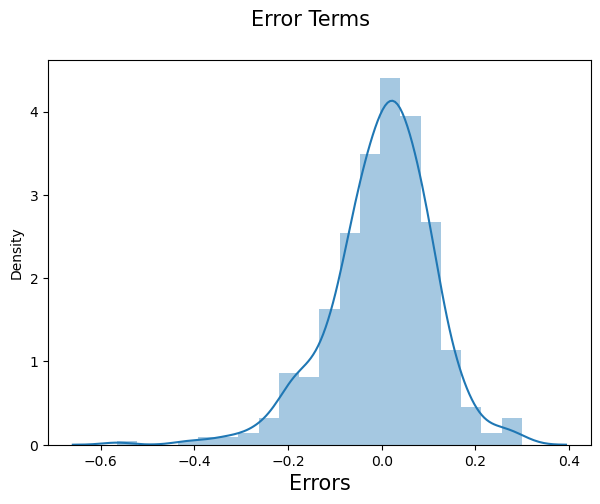

In [82]:
# residual calculations
res = y_train - y_train_pred

# Plot the histogram of the error terms
fig = plt.figure(figsize=[7,5])
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 15)        # Plot heading 
plt.xlabel('Errors', fontsize = 15)
plt.show()

INSIGHT: - From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

## Check for Homoscedasticity

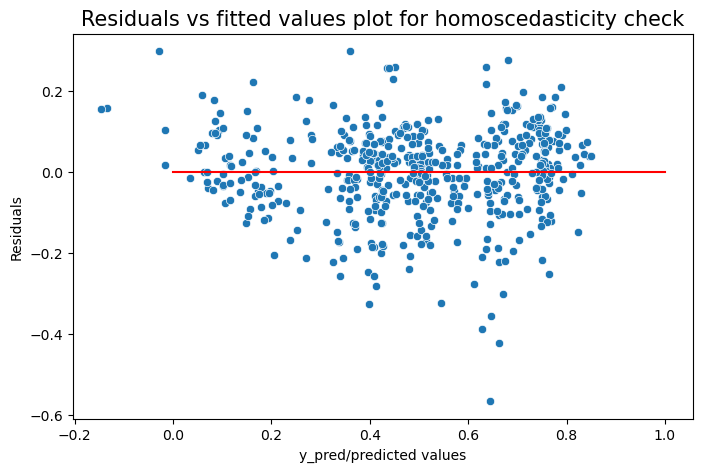

In [83]:
# Check for Homoscedasticity
plt.figure(figsize = [8,5])
p = sns.scatterplot(x = y_train_pred, y = res)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')

p = sns.lineplot(x= [0,1],y = [0,0],color='red')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check', fontsize = 15)

INSIGHT: - From the above plot, we can see that residuals have equal or almost equal variance across the regression line.

## Making predictions using final model

- We have fitted the model and checked the assumptions, it's time to make predictions using the final model (Model 8)

#### Applying the scaling on the test sets

- We will only use scaler.transform, as we want to use the metrics that model learned from the training data to be applied on the test data.

In [84]:
# Apply scaler() to all numeric variables
df_test_bike_new[num_vars] = scaler.transform(df_test_bike_new[num_vars])
df_test_bike_new.head()

,temp,atemp,humidity,windspeed,count,season_spring,season_summer,season_winter,year_2019,month_Aug,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,workingday_Yes,weather_Good/Clear,weather_Moderate/Misty
468,0.543115,0.536771,0.518248,0.422104,0.848606,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
148,0.758058,0.704203,0.843709,0.479765,0.526017,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
302,0.324018,0.317998,0.642765,0.386287,0.350115,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
355,0.453814,0.455552,0.780592,0.062325,0.318363,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
515,0.773634,0.724915,0.507943,0.433030,0.833877,0,1,0,1,0,...,0,0,0,0,0,0,0,1,1,0


In [85]:
# variables after scaling the test data
df_test_bike_new.describe()

,temp,atemp,humidity,windspeed,count,season_spring,season_summer,season_winter,year_2019,month_Aug,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,workingday_Yes,weather_Good/Clear,weather_Moderate/Misty
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.527468,0.501760,0.629546,0.435511,0.479553,0.283105,0.237443,0.228311,0.452055,0.109589,...,0.031963,0.123288,0.173516,0.127854,0.141553,0.132420,0.168950,0.716895,0.657534,0.315068
std,0.229936,0.215759,0.152584,0.212750,0.233091,0.451539,0.426491,0.420705,0.498836,0.313092,...,0.176306,0.329520,0.379560,0.334692,0.349389,0.339723,0.375566,0.451539,0.475622,0.465607
min,0.047675,0.051010,0.193646,0.060760,-0.049378,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.324018,0.314694,0.520479,0.281156,0.285826,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.507811,0.496145,0.608416,0.416900,0.471206,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.726388,0.685028,0.735901,0.534288,0.644151,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,0.970925,0.939531,1.002146,1.214955,0.980804,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [86]:
# Dividing test set into x_test and y_test sets for the model building
y_test = df_test_bike_new.pop('count')
x_test = df_test_bike_new

print(y_test.shape)
print(x_test.shape)

(219,)
(219, 29)


In [87]:
#Selecting the variables that were part of final model (Model 8).
col_test = x_train_rfe8.columns

x_test = x_test[col_test]

# Adding constant variable to test dataframe
x_test_lm8 = sm.add_constant(x_test)

x_test_lm8.head()

,const,windspeed,season_spring,year_2019,month_Dec,month_Nov,month_Sept,weather_Good/Clear,weather_Moderate/Misty
468,1.0,0.422104,0,1,0,0,0,1,0
148,1.0,0.479765,0,0,0,0,0,1,0
302,1.0,0.386287,0,0,0,0,0,1,0
355,1.0,0.062325,1,0,1,0,0,0,1
515,1.0,0.433030,0,1,0,0,0,1,0


In [88]:
# Making predictions using the final model (lr8)
y_test_pred = lr8.predict(x_test_lm8)

## Model Evaluation 

Text(0, 0.5, 'y_test_pred')

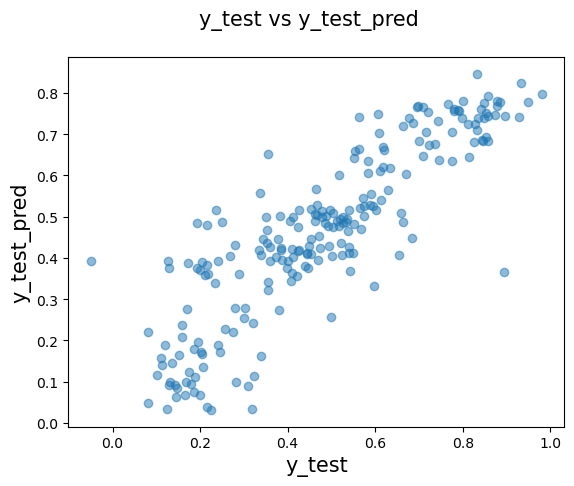

In [89]:
# Plotting y_test and y_test_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_test_pred, alpha=.5)
fig.suptitle('y_test vs y_test_pred', fontsize = 15)         # Plot heading 
plt.xlabel('y_test', fontsize = 15)                          # X-label
plt.ylabel('y_test_pred', fontsize = 15) 

We can see there is linear relationship between y_test and y_test_pred

## Residaul Analysis

In [90]:
from sklearn.metrics import r2_score

r2_test = r2_score(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)

print('Test data r^2 :',round((r2_test*100),2))
print('Train data r^2 :',round((r2_train*100),2))

Test data r^2 : 73.97
Train data r^2 : 78.16


## Adjusted R^2 value for Test

In [91]:
# n for test data ,n1 for train data is number of rows
n = x_test.shape[0]
n1 = x_train_rfe8.shape[0]

# Number of features (predictors, p for test data, p1 for train data) is the number of columns
p = x_test.shape[1]
p1 = x_train_rfe8.shape[1]


# We find the Adjusted R-squared using the formula

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_train = 1-(1-r2_train)*(n1-1)/(n1-p1-1)

print('Test data adjusted r^2 :',round((adjusted_r2_test*100),2))
print('Train data adjusted r^2 :',round((adjusted_r2_train*100),2))

Test data adjusted r^2 : 72.98
Train data adjusted r^2 : 77.82


## Final result comparision:

- Test data r^2 : 73.97
- Train data r^2 : 78.16

- Test data adjusted r^2 : 72.98
- Train data adjusted r^2 : 77.82


### As per our final Model, the below variables influences the bike booking :

- Windspeed
- September Month
- Year-2019
- Spring Seaon
- November and december montha
- If the weather is clear/Good or Moderate/Misty

### Recommendations:

- Comapny should check the wether forcast to meet the bike demands.
- During good clear wether give some discounts/coupons to attract custmers.
- During Septmber month (bike demand is high) comany needs to plan meet the demand.